# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In /home/user21st/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/user21st/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/user21st/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/user21st/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/user21st/.local/lib/python3.6/site-packages/matplotlib/

Number of faces detected: 1


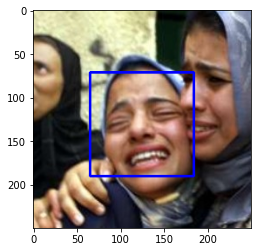

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

In [33]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
count1 = 0
for img in human_files_short:
    count1 += face_detector(img)
print(f'{count1/len(human_files_short)*100:.1f}%, Total {count1} human faces found in {len(human_files_short)} human images')
print('This is the accuracy\n')

count2 = 0
for img in dog_files_short:
    count2 += face_detector(img)
print(f'{count2/len(dog_files_short)*100:.1f}%, Total {count2} human faces found in {len(dog_files_short)} dog images')
print('This is the error rate\n')


100.0%, Total 100 human faces found in 100 human images
This is the accuracy

16.0%, Total 16 human faces found in 100 dog images
This is the error rate



We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    img = Image.open(img_path)
    
    ## Normalize
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ## Transform
    # resize to default input image size of 224x224, below we resize and crop
    transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), normalize])
    img_tensor = transform(img).unsqueeze_(0)
    
    # Load tensor on GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    # For inference
    VGG16.eval()
    
    # Disabling gradient calculation is useful for inference, saves memory consumption
    with torch.no_grad():
        classes = VGG16(img_tensor)
        
    ## Return the *index* of the predicted class for that image
    return classes.argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return True if 151 <= index and index <= 268 else False  # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count1 = 0
for img_path in dog_files_short:
    count1 += dog_detector(img_path)
print(f'{count1/len(dog_files_short)*100:.1f}%, Total {count1} dog faces found in {len(dog_files_short)} dog images')
print('This is the accuracy\n')

count2 = 0
for img_path in human_files_short:
    count2 += dog_detector(img_path)
print(f'{count2/len(human_files_short)*100:.1f}%, Total {count2} dog faces found in {len(human_files_short)} human images')
print('This is the error rate\n')

100.0%, Total 100 dog faces found in 100 dog images
This is the accuracy

0.0%, Total 0 dog faces found in 100 human images
This is the error rate



We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import torch

In [12]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# parameters 
batch_size = 32
num_workers = 0

# Set data paths
path_to_data = 'dogImages/'
folders = {'train': 'train', 'valid': 'valid', 'test': 'test'}
dict_keys = ['train', 'valid', 'test']

# create normalizer
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
# Set transforms
trans = {'train': transforms.Compose([transforms.Resize(256), transforms.RandomHorizontalFlip(), transforms.RandomRotation(5),transforms.CenterCrop(224), transforms.ToTensor(), normalize]), 
         'valid': transforms.Compose([transforms.Resize(256), transforms.RandomHorizontalFlip(), transforms.RandomRotation(5),transforms.CenterCrop(224), transforms.ToTensor(), normalize]),
         'test': transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), normalize])}

# create dataset
data= {}
for key in dict_keys:
    data.update({key : datasets.ImageFolder(path_to_data+folders[key], transform=trans[key])})
    
# create data loaders
loaders_scratch = {}
for key in dict_keys:
    loaders_scratch .update({key : torch.utils.data.DataLoader(data[key], batch_size=batch_size, shuffle=True, num_workers=num_workers)})

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

> The pre-processing steps involve first resizing the image to 256x256 and then performing random-filp and/or rotation up to 5 degrees. After which a center crop is performed to the desired image size of 224x224. This allows for the essential features to be centered, and it is also important to augment the image before cropping. Finally, the image is converted to a tensor and normalized. The input image size was chosen to be 224x224 becuase the network I built is inspired by VGG16 and hence I went with the same input image size.

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

> I did choose to augment the dataset. There are two augment operations, Random-Flip and Rotaion of up to 5 degrees. This allows for the network to generalize better as it learns that all the variations of the same image result in the same label. 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = 133

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*512, 512) #25088
        #self.fc2 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, num_classes)
        
        # Normalization
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        ## Define forward behavior
        # Conv layers - Feature detection
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        # Flatten
        x = x.view(-1, 7*7*512) #25088
        # Fully connected - Classifier
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

> The CNN architecture that I ended up with was inspired from VGG16. The convolution layers were chosen from column A architecture. But I didn't choose to repeat each convolution layer before pooling. This is because I thought the complexity of the problem I am trying to solve here is relatively easy compared to the 1000 different categories. Hence there are fewer features to be detected. Next, the output of the convolution or feature detection portion of the network was flattened to be fed into the fully connected network or the classifier portion of the network. I chose two fully connected layers; the first FC layer starts with the total pixels at the end of convolution layers, which is 7 * 7 * 512 to 512, and the next one is 512->133, which is the number of labels. In between the two FC layers, I used a dropout layer, and this is to avoid overfitting to training data.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear gradients of all optimized variables
            optimizer.zero_grad()
            # forwarward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # perform optimization step
            optimizer.step()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            
            
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')



Epoch: 1 	Training Loss: 4.888966 	Validation Loss: 4.871403
Validation loss decreased (inf --> 4.871403).  Saving model ...
Epoch: 2 	Training Loss: 4.838046 	Validation Loss: 4.682314
Validation loss decreased (4.871403 --> 4.682314).  Saving model ...
Epoch: 3 	Training Loss: 4.501217 	Validation Loss: 4.422232
Validation loss decreased (4.682314 --> 4.422232).  Saving model ...
Epoch: 4 	Training Loss: 4.278875 	Validation Loss: 4.182371
Validation loss decreased (4.422232 --> 4.182371).  Saving model ...
Epoch: 5 	Training Loss: 4.119110 	Validation Loss: 4.077655
Validation loss decreased (4.182371 --> 4.077655).  Saving model ...
Epoch: 6 	Training Loss: 3.956884 	Validation Loss: 3.923495
Validation loss decreased (4.077655 --> 3.923495).  Saving model ...
Epoch: 7 	Training Loss: 3.791081 	Validation Loss: 3.857402
Validation loss decreased (3.923495 --> 3.857402).  Saving model ...
Epoch: 8 	Training Loss: 3.660864 	Validation Loss: 3.823748
Validation loss decreased (3.85740

In [17]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.561034


Test Accuracy: 18% (154/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
use_cuda = torch.cuda.is_available()

In [22]:
import torchvision.models as models
import torch.nn as nn

# Specify model architecture
# Bas model selected as RESNET50
model_transfer = models.resnet50(pretrained=True)
# Freeze the weights of feature detection layer
for param in model_transfer.parameters():
    param.requires_grad = False
# we now need to build the fully connected classifier portion
model_transfer.fc = nn.Linear(2048, num_classes, bias=True)
# we now ensure that weights of FC layers are updated, usually set to true by defalut 
for param in model_transfer.fc.parameters():
    param.requires_grad = True

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

> For transfer learning, I chose to start with ResNet50 base model and then freeze the network's weights of feature detection portion. Next, I created a FC layer and attached it to the output of the feature detection layer. I set the weights of the classifier layer to update during training. The reason to choose ResNet 50 as my base model is because it is a classic neural network used as a backbone for many computer vision tasks. Also, since its a deep neural network, meaning it has 50 layers, which allow for more features to be detected. This could allow the model to pick up the subtle feature difference between various breeds of dogs. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
import torch.optim as optim

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear gradients of all optimized variables
            optimizer.zero_grad()
            # forwarward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # perform optimization step
            optimizer.step()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            
            
    # return trained model
    return model

In [26]:
# train the model
model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.861074 	Validation Loss: 4.741574
Validation loss decreased (inf --> 4.741574).  Saving model ...
Epoch: 2 	Training Loss: 4.649438 	Validation Loss: 4.512198
Validation loss decreased (4.741574 --> 4.512198).  Saving model ...
Epoch: 3 	Training Loss: 4.462958 	Validation Loss: 4.343228
Validation loss decreased (4.512198 --> 4.343228).  Saving model ...
Epoch: 4 	Training Loss: 4.286045 	Validation Loss: 4.165967
Validation loss decreased (4.343228 --> 4.165967).  Saving model ...
Epoch: 5 	Training Loss: 4.119147 	Validation Loss: 4.001207
Validation loss decreased (4.165967 --> 4.001207).  Saving model ...
Epoch: 6 	Training Loss: 3.953655 	Validation Loss: 3.820854
Validation loss decreased (4.001207 --> 3.820854).  Saving model ...
Epoch: 7 	Training Loss: 3.800119 	Validation Loss: 3.649893
Validation loss decreased (3.820854 --> 3.649893).  Saving model ...
Epoch: 8 	Training Loss: 3.649270 	Validation Loss: 3.526798
Validation loss decreased (3.64989

Epoch: 70 	Training Loss: 0.906517 	Validation Loss: 0.865387
Validation loss decreased (0.893197 --> 0.865387).  Saving model ...
Epoch: 71 	Training Loss: 0.896847 	Validation Loss: 0.883316
Epoch: 72 	Training Loss: 0.884279 	Validation Loss: 0.882106
Epoch: 73 	Training Loss: 0.872245 	Validation Loss: 0.849521
Validation loss decreased (0.865387 --> 0.849521).  Saving model ...
Epoch: 74 	Training Loss: 0.863293 	Validation Loss: 0.848786
Validation loss decreased (0.849521 --> 0.848786).  Saving model ...
Epoch: 75 	Training Loss: 0.862378 	Validation Loss: 0.829902
Validation loss decreased (0.848786 --> 0.829902).  Saving model ...
Epoch: 76 	Training Loss: 0.853409 	Validation Loss: 0.812134
Validation loss decreased (0.829902 --> 0.812134).  Saving model ...
Epoch: 77 	Training Loss: 0.844563 	Validation Loss: 0.840715
Epoch: 78 	Training Loss: 0.837397 	Validation Loss: 0.817218
Epoch: 79 	Training Loss: 0.831824 	Validation Loss: 0.819612
Epoch: 80 	Training Loss: 0.820295 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.715865


Test Accuracy: 86% (720/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data['train'].classes]

def predict_breed_transfer(img_path):
     ## Load and pre-process an image from the given img_path
    img = Image.open(img_path)
    
    ## Normalize
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ## Transform
    # resize to default input image size of 224x224, below we resize and crop
    transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), normalize])
    img_tensor = transform(img).unsqueeze_(0)
    
    # Load tensor on GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    # For inference
    model_transfer.eval()
    
    # Disabling gradient calculation is useful for inference, saves memory consumption
    with torch.no_grad():
        classes = model_transfer(img_tensor)
        
    ## Return the breed
    return class_names[classes.argmax()] # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [29]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    # Now test various models against the image
    if face_detector(img_path):
        print('Hello, Human!')
        dog_breed = predict_breed_transfer(img_path)
        print(f'You look like a {dog_breed}')
    elif dog_detector(img_path):
        print('Dog Detected!')
        dog_breed = predict_breed_transfer(img_path)
        print(f'Detected Dog is a {dog_breed}')
    else:
        print('ERROR: Nothing detected!')
        
    print('\n--------------------------------\n')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

> I tested the algorithm on images of my own dog, and some acquired from the internet. For the most part, it did a great job at detecting human faces, but when it came to dog breeds, it seemed to struggle. For example, my dog is a Golden Doodle, but it was categorized as Havanese. Here are a few possible improvements to the application:
- Adding more augmentations to the training data as well as increasing the overall size of training data. This would allow the model to generalize better, which will result in better accuracy on data its never seen before. 
- I observed that the algorithm struggled when the image was not cropped to the dog area. That is, the dog was not centered in the image. Again I think this can be improved by augmentation and varying input data. This could also be solved by adding a Region Proposal Network (RPN) to first narrow down the area where the dog is in the image and then crop to that region and classify it.
- In terms of the overall application, a possible improvement would be to use multiple models and use the best of three results. 

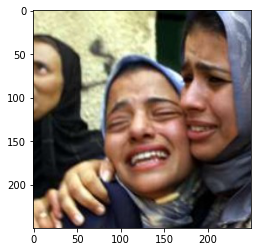

Hello, Human!
You look like a Dogue de bordeaux

--------------------------------



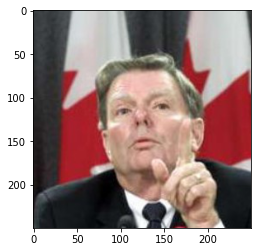

Hello, Human!
You look like a Dogue de bordeaux

--------------------------------



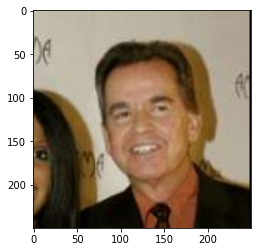

Hello, Human!
You look like a Dachshund

--------------------------------



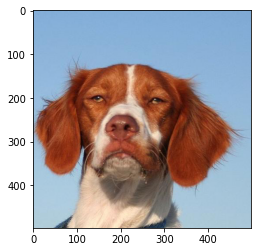

Dog Detected!
Detected Dog is a Brittany

--------------------------------



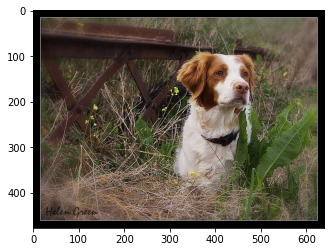

Dog Detected!
Detected Dog is a Brittany

--------------------------------



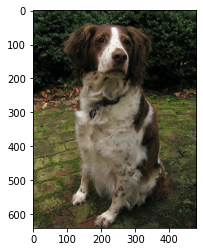

Hello, Human!
You look like a English springer spaniel

--------------------------------



In [30]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [31]:
import glob
new_dog_images = np.array(glob.glob('images/dog*'))
new_human_faces = np.array(glob.glob('images/face*'))
new_images_path = np.concatenate((new_dog_images,new_human_faces), axis = 0)

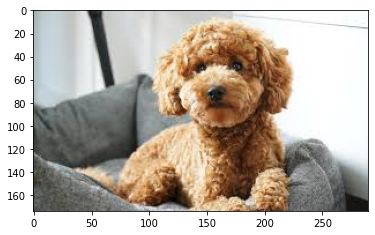

Dog Detected!
Detected Dog is a Bichon frise

--------------------------------



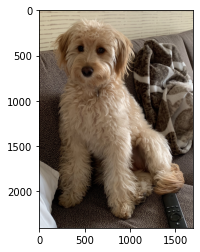

Dog Detected!
Detected Dog is a Havanese

--------------------------------



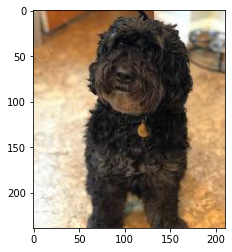

Dog Detected!
Detected Dog is a Portuguese water dog

--------------------------------



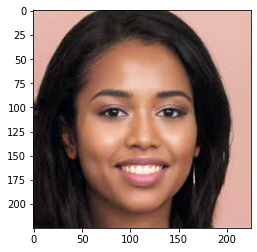

Hello, Human!
You look like a English toy spaniel

--------------------------------



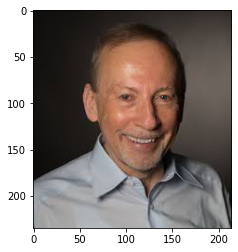

Hello, Human!
You look like a Dachshund

--------------------------------



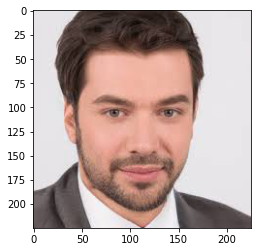

Hello, Human!
You look like a Dachshund

--------------------------------



In [32]:
for img_path in new_images_path:
    run_app(img_path)